# Heatmaps of the number of high-quality cells retrieved from each well

In [1]:
suppressWarnings({suppressPackageStartupMessages({
    library(ComplexHeatmap)
    library(circlize)
})})

Loading the data: number of high-quality cells retrieved per well according to their HTO matching pair.

In [2]:
JHOS2 <- read.delim(file = "JHOS2_n_cells_per_HTO_classification.txt")
rownames(JHOS2) <- JHOS2$wells_classification

PDC3 <- read.delim(file = "PDC3_n_cells_per_HTO_classification.txt")
rownames(PDC3) <- PDC3$wells_classification

PDC2 <- read.delim(file = "PDC2_n_cells_per_HTO_classification.txt")
rownames(PDC2) <- PDC2$wells_classification

Creating a matrix with 8 rows and 12 columns for each for the heatmap. The heatmap layout will mimick a 96-well plate.

In [3]:
JHOS2_heatmap <- PDC3_heatmap <- PDC2_heatmap <- matrix(nrow = 8, ncol = 12, dimnames = list(paste("row", 1:8, sep = ""), paste("column", 1:12, sep = "")))

Filling each cell with the correspondent well value.

In [4]:
for(i in 1:8){
  for(j in 1:12){
    JHOS2_heatmap[paste0("row", i), paste0("column", j)] <- ifelse(test = !is.na(JHOS2[paste0("column", j, "_", "row", i), "Freq"]), 
                                                                  yes =  JHOS2[paste0("column", j, "_", "row", i), "Freq"], 
                                                                  no = 0)
    PDC3_heatmap[paste0("row", i), paste0("column", j)] <- ifelse(test = !is.na(PDC3[paste0("column", j, "_", "row", i), "Freq"]), 
                                                                  yes =  PDC3[paste0("column", j, "_", "row", i), "Freq"], 
                                                                  no = 0)
    PDC2_heatmap[paste0("row", i), paste0("column", j)] <- ifelse(test = !is.na(PDC2[paste0("column", j, "_", "row", i), "Freq"]), 
                                                                  yes =  PDC2[paste0("column", j, "_", "row", i), "Freq"], 
                                                                  no = 0)
    }
}

png 
  2

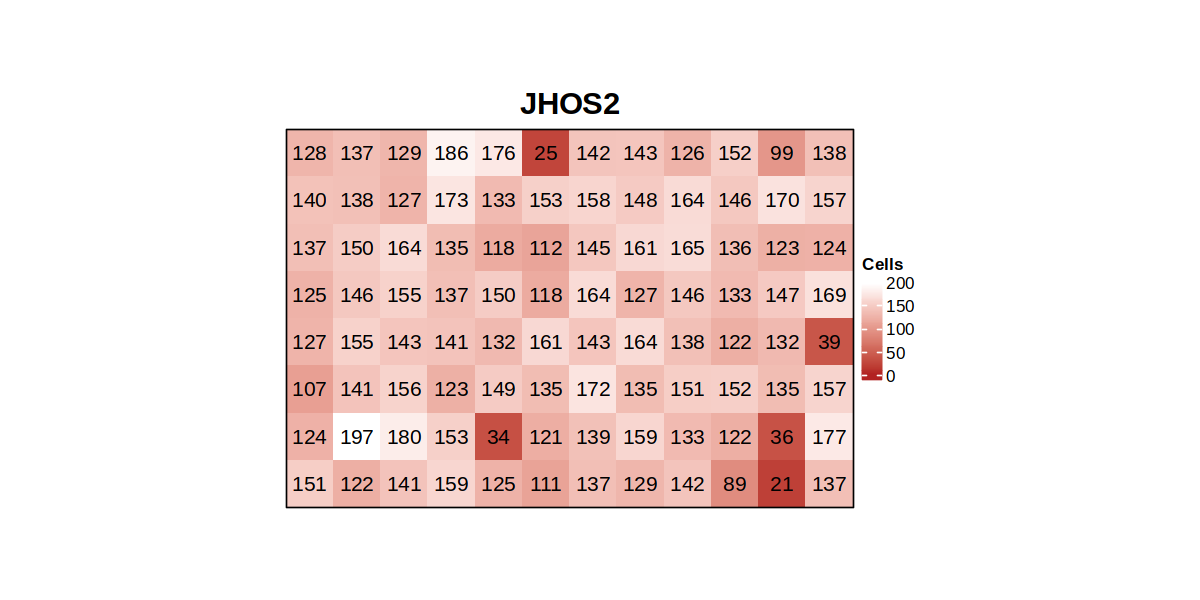

In [5]:
options(repr.plot.width = 10, repr.plot.height = 5)
heatmap_1 <- Heatmap(matrix = JHOS2_heatmap,
        column_title = "JHOS2",
        column_title_gp = gpar(fontsize = 18, fontface = "bold"),
        name = "Cells",
        border = T,
        col = colorRamp2(breaks = c(0, max(JHOS2_heatmap)), colors = c("firebrick", "white")),
        cluster_rows = F,
        show_column_names = F,
        show_row_names = F,
        width = unit(1, "cm") * 12,
        height = unit(1, "cm") * 8,
        cluster_columns = F,
        cell_fun = function(j, i, x, y, width, height, fill) {
          grid.text(sprintf("%.f", JHOS2_heatmap[i, j]), x, y, gp = gpar(fontsize = 12))
        })
heatmap_1

pdf(file = "JHOS2_cells_per_well_heatmap.pdf", width = 10, height = 5)
heatmap_1
dev.off()

png 
  2

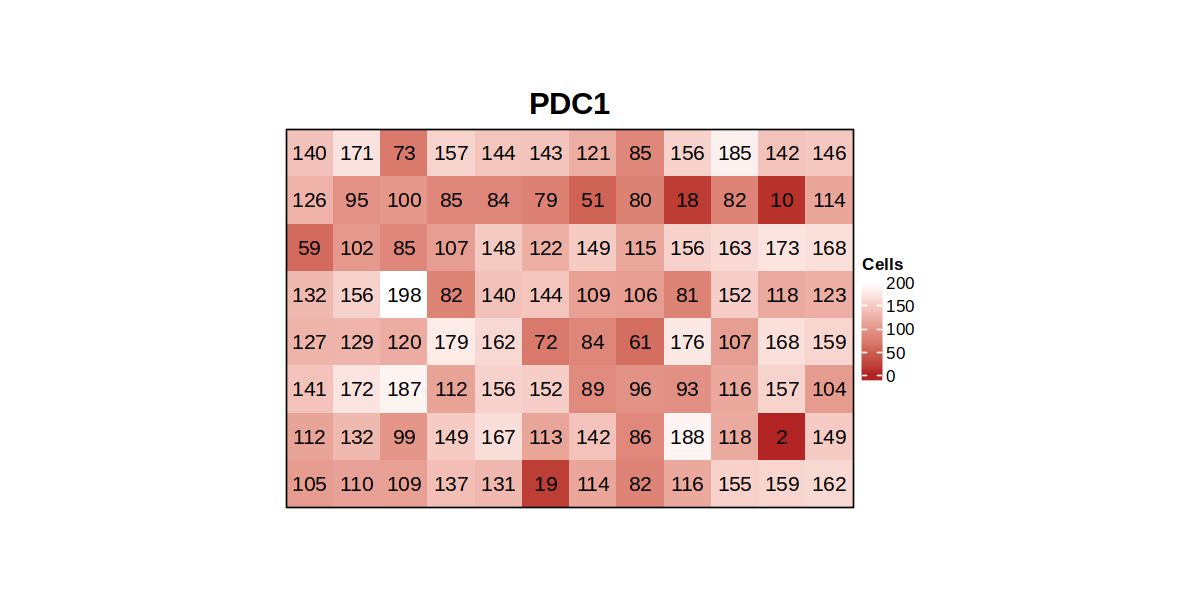

In [6]:
options(repr.plot.width = 10, repr.plot.height = 5)
heatmap_2 <- Heatmap(matrix = PDC3_heatmap,
        column_title = "PDC3",
        column_title_gp = gpar(fontsize = 18, fontface = "bold"),
        name = "Cells",
        border = T,
        col = colorRamp2(breaks = c(0, max(PDC3_heatmap)), colors = c("firebrick", "white")),
        cluster_rows = F,
        show_column_names = F,
        show_row_names = F,
        width = unit(1, "cm") * 12,
        height = unit(1, "cm") * 8,
        cluster_columns = F,
        cell_fun = function(j, i, x, y, width, height, fill) {
          grid.text(sprintf("%.f", PDC3_heatmap[i, j]), x, y, gp = gpar(fontsize = 12))
        })
heatmap_2

pdf(file = "PDC3_cells_per_well_heatmap.pdf", width = 10, height = 5)
heatmap_2
dev.off()

png 
  2

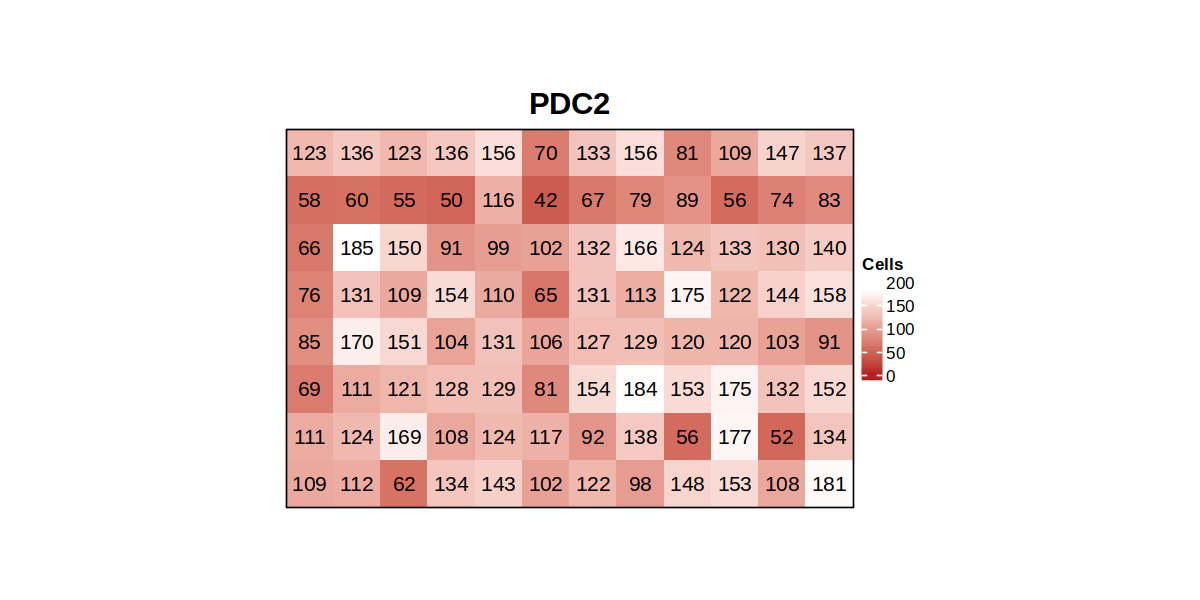

In [7]:
options(repr.plot.width = 10, repr.plot.height = 5)
heatmap_3 <- Heatmap(matrix = PDC2_heatmap,
        column_title = "PDC2",
        column_title_gp = gpar(fontsize = 18, fontface = "bold"),
        name = "Cells",
        border = T,
        col = colorRamp2(breaks = c(0, max(PDC2_heatmap)), colors = c("firebrick", "white")),
        cluster_rows = F,
        show_column_names = F,
        show_row_names = F,
        width = unit(1, "cm") * 12,
        height = unit(1, "cm") * 8,
        cluster_columns = F,
        cell_fun = function(j, i, x, y, width, height, fill) {
          grid.text(sprintf("%.f", PDC2_heatmap[i, j]), x, y, gp = gpar(fontsize = 12))
        })
heatmap_3

pdf(file = "PDC2_cells_per_well_heatmap.pdf", width = 10, height = 5)
heatmap_3
dev.off()

Median cells per well:

In [8]:
message("JHOS2: ", median(JHOS2_heatmap))
message("PDC3: ", median(PDC3_heatmap))
message("PDC2: ", median(PDC2_heatmap))

JHOS2: 139.5

PDC1: 121.5

PDC2: 122



In [9]:
sessionInfo()

R version 4.2.2 (2022-10-31)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: Red Hat Enterprise Linux 8.9 (Ootpa)

Matrix products: default
BLAS/LAPACK: /homedir01/adini22/.conda/envs/cellhashing_analyses/lib/libopenblasp-r0.3.21.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] grid      stats     graphics  grDevices utils     datasets  methods  
[8] base     

other attached packages:
[1] circlize_0.4.15       ComplexHeatmap_2.14.0

loaded via a namespace (and not attached):
 [1] pillar_1.9.0        compiler_4.2.2      RColorBrewer_1.1-3 
 [4] base64enc_0.1-3     iterators_1.0.14    tools_4.2.2        
 [7] digest_0.6.31       uuid_1.1-